In [1]:
import numpy as np 
import pandas as pd

# Cargar Datos

In [2]:
#!pip install wolta

In [3]:
df = pd.read_csv('../data/Crime_Data_from_2020_to_Present.csv')
df.shape

(982638, 28)

In [4]:
from wolta.data_tools import col_types
types = col_types(df, print_columns=True)

DR_NO: int64
Date Rptd: str
DATE OCC: str
TIME OCC: int64
AREA: int64
AREA NAME: str
Rpt Dist No: int64
Part 1-2: int64
Crm Cd: int64
Crm Cd Desc: str
Mocodes: float
Vict Age: int64
Vict Sex: str
Vict Descent: str
Premis Cd: float64
Premis Desc: str
Weapon Used Cd: float64
Weapon Desc: float
Status: str
Status Desc: str
Crm Cd 1: float64
Crm Cd 2: float64
Crm Cd 3: float64
Crm Cd 4: float64
LOCATION: str
Cross Street: float
LAT: float64
LON: float64


In [5]:
from wolta.data_tools import seek_null
seeked = seek_null(df, print_columns=True)

Mocodes has 145262 null values
Vict Sex has 138445 null values
Vict Descent has 138456 null values
Premis Cd has 14 null values
Premis Desc has 585 null values
Weapon Used Cd has 656471 null values
Weapon Desc has 656471 null values
Status has 1 null values
Crm Cd 1 has 11 null values
Crm Cd 2 has 913763 null values
Crm Cd 3 has 980327 null values
Crm Cd 4 has 982574 null values
Cross Street has 830789 null values


In [6]:
from wolta.data_tools import unique_amounts
unique_amounts(df)

{'DR_NO': 982638,
 'Date Rptd': 1735,
 'DATE OCC': 1735,
 'TIME OCC': 1439,
 'AREA': 21,
 'AREA NAME': 21,
 'Rpt Dist No': 1209,
 'Part 1-2': 2,
 'Crm Cd': 140,
 'Crm Cd Desc': 140,
 'Mocodes': 309365,
 'Vict Age': 104,
 'Vict Sex': 6,
 'Vict Descent': 21,
 'Premis Cd': 315,
 'Premis Desc': 307,
 'Weapon Used Cd': 80,
 'Weapon Desc': 80,
 'Status': 7,
 'Status Desc': 6,
 'Crm Cd 1': 143,
 'Crm Cd 2': 127,
 'Crm Cd 3': 38,
 'Crm Cd 4': 7,
 'LOCATION': 66265,
 'Cross Street': 10327,
 'LAT': 5424,
 'LON': 4980}

# Data Manipulation

In [7]:
df['Rpt Dist No'] = df['Rpt Dist No'].astype(str)
#Eliminar features con % de missing values
from wolta.feature_tools import list_deletings
df = list_deletings(df, extra=['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'Premis Desc', 'Weapon Desc', 'AREA NAME', 'Crm Cd Desc'], unique_tolerance=0.1, null_tolerance=5)


The maximum tolerated null value amount is 49131
Mocodes will be deleted because it has 145262 null values and this is 96131 values more than tolerance
Vict Sex will be deleted because it has 138445 null values and this is 89314 values more than tolerance
Vict Descent will be deleted because it has 138456 null values and this is 89325 values more than tolerance
Weapon Used Cd will be deleted because it has 656471 null values and this is 607340 values more than tolerance
Crm Cd 2 will be deleted because it has 913763 null values and this is 864632 values more than tolerance
Crm Cd 3 will be deleted because it has 980327 null values and this is 931196 values more than tolerance
Crm Cd 4 will be deleted because it has 982574 null values and this is 933443 values more than tolerance
Cross Street will be deleted because it has 830789 null values and this is 781658 values more than tolerance
The maximum tolerated unique value amount is 982.0 in string data
Rpt Dist No might be deleted becaus

In [8]:
del df['LOCATION']
seeked = seek_null(df, print_columns=True)


Premis Cd has 14 null values
Status has 1 null values
Crm Cd 1 has 11 null values


In [9]:
df = df.dropna()

# Convertir colkumnas str a numeric
from wolta.data_tools import make_numerics

types = col_types(df)
loc = 0

for col in df.columns:
    if types[loc] == 'str':
        df[col] = make_numerics(df[col])
    
    loc += 1


# Data Analysis

In [10]:
df.describe()

,AREA,Rpt Dist No,Part 1-2,Crm Cd,Vict Age,Premis Cd,Status,Status Desc,Crm Cd 1,LAT,LON
count,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000,982613.000000
mean,10.700342,451.470409,1.404255,500.822039,29.080269,306.132412,1.034858,1.034858,500.578501,33.995722,-118.082219
std,6.107792,299.788930,0.490747,206.212335,21.969968,219.053411,0.474065,0.474065,206.011200,1.636750,5.673012
min,1.000000,0.000000,1.000000,110.000000,-4.000000,101.000000,0.000000,0.000000,110.000000,0.000000,-118.667600
25%,5.000000,187.000000,1.000000,331.000000,0.000000,101.000000,1.000000,1.000000,331.000000,34.014600,-118.430500
50%,11.000000,415.000000,1.000000,442.000000,30.000000,203.000000,1.000000,1.000000,442.000000,34.058900,-118.322500
75%,16.000000,686.000000,2.000000,626.000000,44.000000,501.000000,1.000000,1.000000,626.000000,34.164900,-118.273900
max,21.000000,1208.000000,2.000000,956.000000,120.000000,976.000000,5.000000,5.000000,956.000000,34.334300,0.000000


<Axes: ylabel='count'>

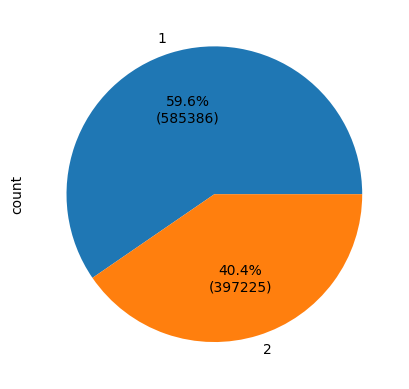

In [12]:
df['Part 1-2'].value_counts().plot(kind='pie', autopct=lambda p: f'{p:.1f}%\n({int(p * sum(df["Part 1-2"].value_counts()) / 100)})')


# Data Preparation

In [47]:
df.shape

(982613, 11)

In [48]:
from sklearn.model_selection import train_test_split

df = df.sample(frac=0.4, random_state=42) # se toma un 40 % de los registro originales para reducir el tiempo de computo para el ejercicio
features = df.drop(columns=['Part 1-2'])  # Variables independientes
target = df['Part 1-2']  # Variable dependiente

# Dividir el dataset en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.3, random_state=42)


In [49]:
train_counts = y_train.value_counts()
print("Distribución de clases en y_train:")
print(train_counts)

# Contar valores únicos en y_test
test_counts = y_test.value_counts()
print("\nDistribución de clases en y_test:")
print(test_counts)

Distribución de clases en y_train:
Part 1-2
1    163696
2    111435
Name: count, dtype: int64

Distribución de clases en y_test:
Part 1-2
1    70245
2    47669
Name: count, dtype: int64


# Modelos

## Modelo Random Forest

In [52]:
import mlflow
import mlflow.sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import mlflow
import datetime

#registrar y versionar nuestros modelos usando MLflow
mlflow.set_tracking_uri("http://localhost:5000") 

# Definir los parámetros para el Grid Search
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [10, 20]
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42), 
                           param_grid=param_grid, 
                           scoring='f1_weighted', 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)


# Asignar nombre al experimento en MLFLOW
mlflow.set_experiment("Experimento Random Forest")
# Asignar nombre al runjob de MLFLOW
run_name = f"Random Forest_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Ejecutar el Grid Search 
# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    grid_search.fit(X_train, y_train)

    # Mejor modelo y predicciones
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Registrar los parámetros y métricas en MLflow
    mlflow.log_param("Best n_estimators", grid_search.best_params_['n_estimators'])
    mlflow.log_param("Best max_depth", grid_search.best_params_['max_depth'])
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)

    # Guardar el modelo en MLflow
    mlflow.sklearn.log_model(best_model, "BestRandomForestModel")

print("Best parameters:", grid_search.best_params_)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 6 candidates, totalling 18 fits
[CV] END ......................max_depth=10, n_estimators=50; total time=   6.7s
[CV] END ......................max_depth=10, n_estimators=50; total time=   6.7s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.7s
[CV] END ......................max_depth=10, n_estimators=50; total time=   6.8s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.9s
[CV] END .....................max_depth=10, n_estimators=100; total time=  13.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=  13.4s
[CV] END .....................max_depth=10, n_estimators=100; total time=  13.6s
[CV] END ......................max_depth=20, n_estimators=50; total time=   6.9s
[CV] END .....................max_depth=20, n_estimators=100; total time=  12.5s
[CV] END .....................max_depth=20, n_estimators=100; total time=  12.7s
[CV] END .....................max_depth=20, n_est

2024/11/05 19:35:41 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 19:35:42 INFO mlflow.tracking._tracking_service.client: 🏃 View run Random Forest_20241105_193454 at: http://localhost:5000/#/experiments/463157336838826563/runs/64cea4c0e4e74f06b08b1a6ba1aa3df6.
2024/11/05 19:35:42 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/463157336838826563.


Best parameters: {'max_depth': 20, 'n_estimators': 100}
F1 Score: 0.9999491152854773
Accuracy: 0.999949115457028


## Modelo Regresion Logistica

In [53]:
import mlflow
import mlflow.sklearn
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import datetime

# Configurar el tracking URI de MLflow
mlflow.set_tracking_uri("http://localhost:5000")

# Definir los parámetros para el Grid Search
param_grid = {
    'C': [0.01, 0.1, 1, 10],  # Valores de regularización
    'penalty': ['l2'],        # L2 es la penalización común en problemas de clasificación
    'solver': ['lbfgs', 'liblinear']  # Solvers compatibles con L2
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=LogisticRegression(random_state=42), 
                           param_grid=param_grid, 
                           scoring='f1_weighted', 
                           cv=3, 
                           n_jobs=-1, 
                           verbose=2)

# Asignar nombre al experimento en MLflow
mlflow.set_experiment("Experimento Logistic Regression")
run_name = f"Logistic Regression_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    # Ajustar el modelo con Grid Search
    grid_search.fit(X_train, y_train)

    # Mejor modelo y predicciones
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test, y_pred)

    # Registrar los parámetros y métricas en MLflow
    mlflow.log_param("Best C", grid_search.best_params_['C'])
    mlflow.log_param("Best penalty", grid_search.best_params_['penalty'])
    mlflow.log_param("Best solver", grid_search.best_params_['solver'])
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)

    # Guardar el modelo en MLflow
    mlflow.sklearn.log_model(best_model, "BestLogisticRegressionModel")

print("Best parameters:", grid_search.best_params_)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


2024/11/05 19:36:28 INFO mlflow.tracking.fluent: Experiment with name 'Experimento Logistic Regression' does not exist. Creating a new experiment.


Fitting 3 folds for each of 8 candidates, totalling 24 fits
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.7s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ...............C=0.01, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ...................C=0.01, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   1.0s
[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.0s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


[CV] END ....................C=0.1, penalty=l2, solver=lbfgs; total time=   1.0s
[CV] END ................C=0.1, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.7s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.7s
[CV] END ......................C=1, penalty=l2, solver=lbfgs; total time=   0.8s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

[CV] END ..................C=1, penalty=l2, solver=liblinear; total time=   0.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.9s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END .....................C=10, penalty=l2, solver=lbfgs; total time=   0.8s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.4s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   0.6s
[CV] END .................C=10, penalty=l2, solver=liblinear; total time=   1.2s


2024/11/05 19:36:32 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 19:36:32 INFO mlflow.tracking._tracking_service.client: 🏃 View run Logistic Regression_20241105_193628 at: http://localhost:5000/#/experiments/644707845448742997/runs/87369a1061964be0a4f12730628e1838.
2024/11/05 19:36:32 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/644707845448742997.


Best parameters: {'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}
F1 Score: 0.8906986046724162
Accuracy: 0.8914039045405974


## Modelo xGBOOST

In [59]:
#!pip install xgboost
# dependencia con libreria libomp --> brew install libomp (para Mac)


In [67]:
import mlflow
import mlflow.sklearn
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import f1_score, accuracy_score
import datetime

# Configurar el tracking URI de MLflow
mlflow.set_tracking_uri("http://localhost:5000")


# Convertir las clases en y_train y y_test para poder ejecutar XGBOOST
y_train_binary = (y_train == 1).astype(int)  # 1 se convierte en 1, y 2 se convierte en 0
y_test_binary = (y_test == 1).astype(int)    # Igual para el conjunto de prueba


# Definir los parámetros para el Grid Search
param_grid = {
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'n_estimators': [50, 100, 200]
}

# Configuración de GridSearchCV
grid_search = GridSearchCV(estimator=XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42),
                           param_grid=param_grid,
                           scoring='f1_weighted',
                           cv=3,
                           n_jobs=-1,
                           verbose=2)

# Asignar nombre al experimento en MLflow
mlflow.set_experiment("Experimento XGBoost")
run_name = f"XGBoost_{datetime.datetime.now().strftime('%Y%m%d_%H%M%S')}"

# Iniciar experimento en MLflow
with mlflow.start_run(run_name=run_name):
    # Ajustar el modelo con Grid Search
    grid_search.fit(X_train, y_train_binary)

    # Mejor modelo y predicciones
    best_model = grid_search.best_estimator_
    y_pred = best_model.predict(X_test)

    # Calcular métricas
    f1 = f1_score(y_test, y_pred, average='weighted')
    accuracy = accuracy_score(y_test_binary, y_pred)

    # Registrar los parámetros y métricas en MLflow
    mlflow.log_param("Best learning_rate", grid_search.best_params_['learning_rate'])
    mlflow.log_param("Best max_depth", grid_search.best_params_['max_depth'])
    mlflow.log_param("Best n_estimators", grid_search.best_params_['n_estimators'])
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("accuracy", accuracy)

    # Guardar el modelo en MLflow
    mlflow.sklearn.log_model(best_model, "BestXGBoostModel")

print("Best parameters:", grid_search.best_params_)
print("F1 Score:", f1)
print("Accuracy:", accuracy)


Fitting 3 folds for each of 27 candidates, totalling 81 fits


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.01, max_depth=3, n_estimators=50; total time=   0.7s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:24] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.8s
[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.8s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=100; total time=   0.9s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ...learning_rate=0.01, max_depth=5, n_estimators=50; total time=   0.7s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:25] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ..learning_rate=0.01, max_depth=3, n_estimators=200; total time=   1.6s
[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.2s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.2s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.7s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=100; total time=   1.1s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.01, max_depth=7, n_estimators=50; total time=   0.6s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:26] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.6s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   1.1s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   1.9s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.0s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ..learning_rate=0.01, max_depth=5, n_estimators=200; total time=   2.0s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   1.2s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=100; total time=   1.3s
[CV] END ....learning_rate=0.1, max_depth=3, n_estimators=50; total time=   0.5s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:27] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.7s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   2.2s
[CV] END ..learning_rate=0.01, max_depth=7, n_estimators=200; total time=   2.2s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.4s
[CV] END ....learning_rate=0.1, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=3, n_estimators=200; total time=   1.3s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:28] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.0s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.8s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.1, max_depth=7, n_estimators=50; total time=   0.8s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   1.2s
[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   1.8s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:29] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ....learning_rate=0.2, max_depth=3, n_estimators=50; total time=   0.5s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=100; total time=   1.2s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   1.9s
[CV] END ...learning_rate=0.1, max_depth=5, n_estimators=200; total time=   2.0s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.8s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.7s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=100; total time=   0.8s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:30] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.7s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   2.0s
[CV] END ....learning_rate=0.2, max_depth=5, n_estimators=50; total time=   0.6s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   2.1s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.1, max_depth=7, n_estimators=200; total time=   2.0s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.

[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   1.3s
[CV] END ...learning_rate=0.2, max_depth=3, n_estimators=200; total time=   1.4s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=100; total time=   1.0s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:31] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.7s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.8s
[CV] END ....learning_rate=0.2, max_depth=7, n_estimators=50; total time=   0.8s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:32] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   1.8s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   1.7s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=100; total time=   1.1s
[CV] END ...learning_rate=0.2, max_depth=5, n_estimators=200; total time=   1.8s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   1.4s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   1.5s
[CV] END ...learning_rate=0.2, max_depth=7, n_estimators=200; total time=   1.4s


/Users/U1037319/Library/Python/3.9/lib/python/site-packages/xgboost/core.py:158: UserWarning: [19:51:33] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
2024/11/05 19:51:35 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2024/11/05 19:51:35 INFO mlflow.tracking._tracking_service.client: 🏃 View run XGBoost_20241105_195119 at: http://localhost:5000/#/experiments/873860809366273853/runs/c6a21bd69fce490b8ae9817c41c7a09e.
2024/11/05 19:51:35 INFO mlflow.tracking._tracking_service.client: 🧪 View experiment at: http://localhost:5000/#/experiments/873860809366273853.


Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}
F1 Score: 0.5957223062082169
Accuracy: 0.999983038485676
